In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rc('font',**{'family':'serif','sans-serif':['Computer Modern Roman']})
plt.rc('text', usetex=True)
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']
plt.rc('font', size=12)


/tmp/ipykernel_15608/3428467955.py:8: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']


In [8]:
df = pd.read_pickle('results/logistic-2023-Dec-31-16-14-13/results.pkl')

In [9]:
df = df.unstack('eps').reset_index(drop=True).stack().reset_index().set_index('eps').drop('level_0', axis=1)

/home/jase/anaconda3/envs/bilev/lib/python3.9/site-packages/pandas/core/generic.py:3889: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [10]:
df = df.rename(columns={'cp': 'CP', 'cp_adjusted': 'CRCP', 'cvg': 'Coverage'}).rename(index={'eps': 'Epsilon'})

In [11]:
df

CP                                    CRCP                      \
      Coverage                size            Coverage                size   
          mean       std      mean       std      mean       std      mean   
eps                                                                          
0.00  0.901448  0.005230  1.787208  0.165494  0.901320  0.005956  1.785784   
0.05  0.926360  0.005127  1.993440  0.160930  0.903904  0.005679  1.840596   
0.10  0.947940  0.005312  2.238844  0.158762  0.907752  0.006142  1.893252   
0.15  0.965040  0.005403  2.524236  0.150360  0.910748  0.006296  1.940744   
0.20  0.977400  0.005014  2.832824  0.119742  0.915248  0.005990  2.002304   
0.25  0.984288  0.004930  3.121232  0.092072  0.919328  0.006475  2.060296   
0.30  0.987712  0.004451  3.369696  0.088317  0.924476  0.008049  2.139044   
0.35  0.989308  0.004065  3.555672  0.072325  0.930608  0.007760  2.236760   
0.40  0.990052  0.004081  3.715936  0.075659  0.938832  0.008905  2.390136   

                
                
           std  
eps             
0.00  0.166801  
0.05  0.155767  
0.10  0.155235  
0.15  0.158561  
0.20  0.162839  
0.25  0.159734  
0.30  0.183357  
0.35  0.185547  
0.40  0.204266

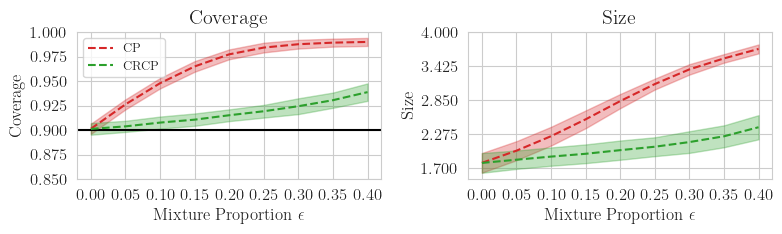

In [12]:
plt.rc('font', size=12)
fig, axs = plt.subplots(1, 2, figsize=(8, 2.5))
axs[0].set_ylim(0.85, 1.0)
axs[0].axhline(0.9, color='black', label='')
eps_values = df.index.values
colors = {'CP': 'tab:red', 'CRCP': 'tab:green'}
for (method, metric), grp in df.groupby(level=(0, 1), axis=1):
    ax = axs[0] if metric == 'Coverage' else axs[1]
    mean = grp.loc[:, (method, metric, 'mean')]
    std = grp.loc[:, (method, metric, 'std')]
    mean.plot(ax=ax, label=method, color=colors[method], linestyle='--')
    ax.fill_between(eps_values, mean - std, mean + std, alpha=0.3, color=colors[method])
    ax.set_xlabel('Mixture Proportion $\\epsilon$')
    ax.set_ylabel(str.capitalize(metric))
    ax.grid()
axs[0].legend(fontsize=9)
axs[0].set_title('Coverage')
axs[1].set_title('Size')
axs[0].grid()
axs[0].set_yticks(np.linspace(0.85, 1.0, 7))
axs[0].set_xticks(np.linspace(0.0, 0.4, 9))
axs[1].set_xticks(np.linspace(0.0, 0.4, 9))
axs[1].set_yticks(np.linspace(1.7, 4.0, 5))

axs[1].grid()
plt.tight_layout()
plt.savefig('figures/logistic_by_eps_plot.pdf', format='pdf', dpi=1200, bbox_inches='tight', transparent=True)